## Documentation

### Introduction

This project applies the Upper Confidence Bound (UCB) algorithm to select the best feature from the Iris dataset to maximize a simulated reward.



### Problem Setup

The Iris dataset contains measurements of different features (sepal length, sepal width, petal length, and petal width) for three types of iris plants. Each feature represents an arm of the bandit problem.


### Algorithm

UCB selects features based on their average reward and the confidence bounds around that estimate, balancing exploration and exploitation.


### Results

A histogram showing the number of times each feature was selected.
A bar plot showing the average reward of each feature.

### Conclusion

By using the UCB algorithm, we effectively managed the exploration-exploitation trade-off in selecting features from the Iris dataset. The visualizations help in understanding the model's behavior and the reward distributions of the features.

## Code Steps

### Step 1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.datasets import load_iris

### Step 2: Load the Iris Dataset

In [3]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names


### Step 3: Simulate Rewards

In [4]:
# Number of rounds
N = 150  # Total number of samples in the Iris dataset

# Number of features
d = data.shape[1]

# Simulate rewards based on feature values
np.random.seed(42)
rewards = np.zeros((N, d))
for i in range(N):
    for j in range(d):
        rewards[i, j] = data[i % data.shape[0], j] + np.random.normal(0, 0.1)


### Step 4: Implement UCB Algorithm

In [5]:
# Initialize parameters
numbers_of_selections = np.zeros(d)
sums_of_rewards = np.zeros(d)
total_rewards = 0
features_selected = []

# UCB process
for n in range(1, N + 1):
    feature = 0
    max_upper_bound = 0
    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # use a large number for initial exploration
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            feature = i
    features_selected.append(feature)
    reward = rewards[n - 1, feature]
    numbers_of_selections[feature] += 1
    sums_of_rewards[feature] += reward
    total_rewards += reward


### Step 5: Visualization

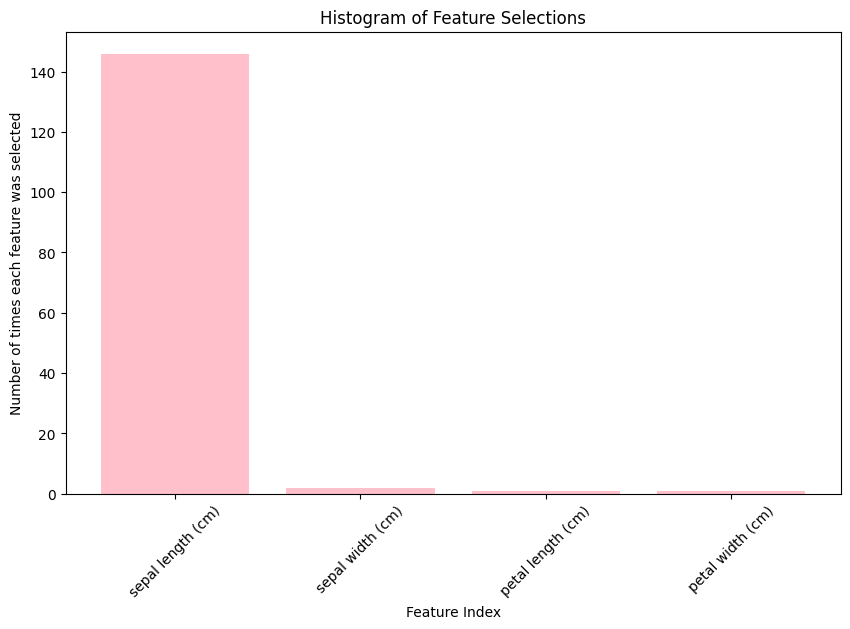

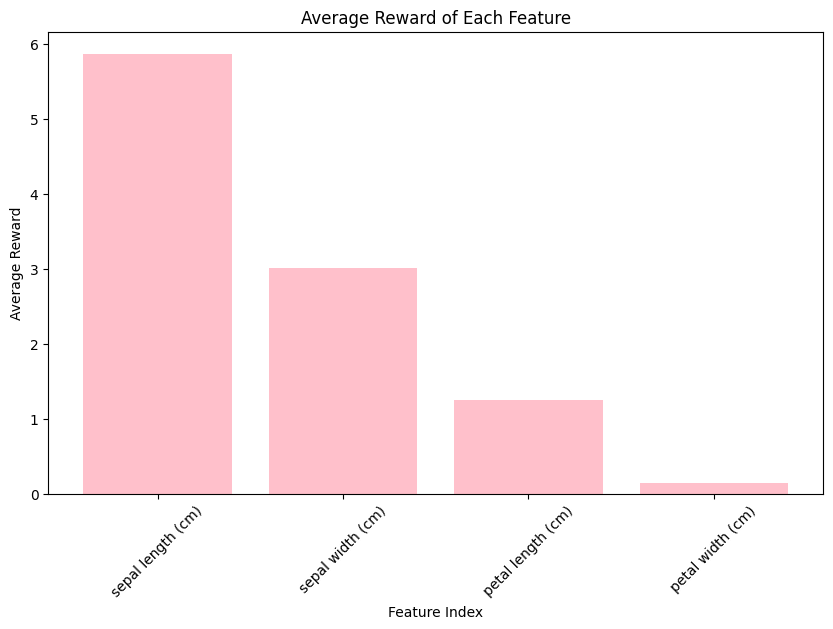

In [8]:
# Histogram of feature selections
plt.figure(figsize=(10, 6))
plt.hist(features_selected, bins=np.arange(d + 1) - 0.5, rwidth=0.8, color='pink')
plt.title('Histogram of Feature Selections')
plt.xlabel('Feature Index')
plt.ylabel('Number of times each feature was selected')
plt.xticks(range(d), feature_names, rotation=45)
plt.show()

# Average reward of each feature
plt.figure(figsize=(10, 6))
average_rewards = sums_of_rewards / numbers_of_selections
plt.bar(range(d), average_rewards, color='pink')
plt.title('Average Reward of Each Feature')
plt.xlabel('Feature Index')
plt.ylabel('Average Reward')
plt.xticks(range(d), feature_names, rotation=45)
plt.show()
